### **Predicting The Unpredictable: A Look Into The World Of Powerlifting**

In recent years, along with the development of economy and society, sports have more people interested in it. Sports help people to increase resistance, reduce work stress and enhance solidarity among people, etc. According to the World Health Organization, each year about 2 million people die from lack of exercise. Lack of exercise will reduce the body's immunity and make adolescents develop abnormally.

Powerlifting is a popular sport. In competition, the impact on powerlifters' performance is mainly due to age, weight, fitness and psychology. Therefore, the training methods of coaches for powerlifters are extremely important, and studying the factors that influence athletes' performance is an inseparable task in training process. based on the data powerlifting data in the international competitions; they calculated the score of powerlifters at their peak performance, thereby giving the development trend of athletes, helping experts to evaluate more correctly about the athletes' abilities before playing.

To address these, regression algorithms such as Linear Regression, Decision tree, Random forest, and XgBoost will be used. We will train and test the data with these algorithms. From this the best model is selected and saved in pkl format. We will also be deploying our model locally using Flask.bold text

In [ ]:
import pandas as pd
import numpy as np

**Reading dataset**

In [ ]:
# Load the individual datasets
data1 = pd.read_csv("/content/drive/MyDrive/Mini Project/X_train.csv")
data2 = pd.read_csv("/content/drive/MyDrive/Mini Project/y_train.csv")

In [ ]:
# Merge the datasets on the 'playerId' column with an inner join
data = data1.merge(data2, on='playerId', how='inner')
# Print the first five rows of the merged dataset
print(data.head())

   playerId           Name Sex Equipment   Age  BodyweightKg BestSquatKg  \
0   19391.0   Carlos Ceron   M       Raw  23.0         87.30       205.0   
1   15978.0   Tito Herrera   M     Wraps  23.0         73.48       220.0   
2   27209.0    Levi Lehman   M       Raw  26.0        112.40       142.5   
3   27496.0  Stacy Hayford   F       Raw  35.0         59.42        95.0   
4   20293.0  Brittany Hirt   F       Raw  26.5         61.40       105.0   

   BestDeadliftKg  BestBenchKg  
0           235.0        125.0  
1           260.0        157.5  
2           220.0        145.0  
3           102.5         60.0  
4           127.5         60.0  


In [ ]:
#Reading 5 values of data1
data1.head()

,playerId,Name,Sex,Equipment,Age,BodyweightKg,BestSquatKg,BestDeadliftKg
0,19391.0,Carlos Ceron,M,Raw,23.0,87.30,205.0,235.0
1,15978.0,Tito Herrera,M,Wraps,23.0,73.48,220.0,260.0
2,27209.0,Levi Lehman,M,Raw,26.0,112.40,142.5,220.0
3,27496.0,Stacy Hayford,F,Raw,35.0,59.42,95.0,102.5
4,20293.0,Brittany Hirt,F,Raw,26.5,61.40,105.0,127.5


In [ ]:
#Reading 5 values of data2
data2.head()

,playerId,BestBenchKg
0,19391.0,125.0
1,15978.0,157.5
2,27209.0,145.0
3,27496.0,60.0
4,20293.0,60.0


In [ ]:
data.describe()

,playerId,Age,BodyweightKg,BestDeadliftKg,BestBenchKg
count,18900.00000,18725.00000,18900.000000,18900.00000,18900.000000
mean,15039.49963,29.66470,85.425557,201.12277,116.963389
std,8674.67268,11.55708,22.959720,62.17163,51.231651
min,0.00000,7.00000,26.130000,18.10000,9.100000
25%,7462.75000,21.50000,67.700000,149.85750,72.500000
50%,15122.50000,26.50000,82.100000,204.12000,115.000000
75%,22540.25000,35.00000,98.970000,247.50000,150.000000
max,29998.00000,83.00000,201.000000,408.23000,425.000000


**Checking Null Values**

In [ ]:
#To find the null values
data.isnull().sum()

playerId            0
Name                0
Sex                 0
Equipment           0
Age               175
BodyweightKg        0
BestSquatKg         0
BestDeadliftKg      0
BestBenchKg         0
dtype: int64

In [ ]:
#To check the datatype of the attributes
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18900 entries, 0 to 18899
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   playerId        18900 non-null  float64
 1   Name            18900 non-null  object 
 2   Sex             18900 non-null  object 
 3   Equipment       18900 non-null  object 
 4   Age             18725 non-null  float64
 5   BodyweightKg    18900 non-null  float64
 6   BestSquatKg     18900 non-null  object 
 7   BestDeadliftKg  18900 non-null  float64
 8   BestBenchKg     18900 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.4+ MB


In [ ]:
#filling the values using the mean of that column
data['Age'].fillna(data['Age'].mean(),inplace=True)
data.isnull().sum()

playerId          0
Name              0
Sex               0
Equipment         0
Age               0
BodyweightKg      0
BestSquatKg       0
BestDeadliftKg    0
BestBenchKg       0
dtype: int64

In [ ]:
# data['BestSquatkg'] = data[ 'BestSquatkg'].astype (float)

# converting the sex column object type to float type
data['Sex'] = data['Sex'].map( { 'M':1, 'F':0} )
 # encode the equipment column
from sklearn.preprocessing import LabelEncoder
data['Equipment']= LabelEncoder().fit_transform(data['Equipment'])
data['BestSquatKg']=LabelEncoder().fit_transform(data['BestSquatKg'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18900 entries, 0 to 18899
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   playerId        18900 non-null  float64
 1   Name            18900 non-null  object 
 2   Sex             18900 non-null  int64  
 3   Equipment       18900 non-null  int64  
 4   Age             18900 non-null  float64
 5   BodyweightKg    18900 non-null  float64
 6   BestSquatKg     18900 non-null  int64  
 7   BestDeadliftKg  18900 non-null  float64
 8   BestBenchKg     18900 non-null  float64
dtypes: float64(5), int64(3), object(1)
memory usage: 1.4+ MB


In [ ]:
data.describe()

,playerId,Sex,Equipment,Age,BodyweightKg,BestSquatKg,BestDeadliftKg,BestBenchKg
count,18900.00000,18900.000000,18900.000000,18900.000000,18900.000000,18900.000000,18900.00000,18900.000000
mean,15039.49963,0.675714,1.524127,29.664700,85.425557,275.607672,201.12277,116.963389
std,8674.67268,0.468120,0.839712,11.503448,22.959720,157.457053,62.17163,51.231651
min,0.00000,0.000000,0.000000,7.000000,26.130000,0.000000,18.10000,9.100000
25%,7462.75000,0.000000,1.000000,21.500000,67.700000,159.000000,149.85750,72.500000
50%,15122.50000,1.000000,1.000000,26.500000,82.100000,244.000000,204.12000,115.000000
75%,22540.25000,1.000000,2.000000,34.500000,98.970000,358.000000,247.50000,150.000000
max,29998.00000,1.000000,3.000000,83.000000,201.000000,625.000000,408.23000,425.000000


In [ ]:
data.shape

(18900, 9)

**Exploratory Data Analysis**

In [ ]:
cor=data.corr()
cor

<ipython-input-10-42f3d3de063e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=data.corr()


,playerId,Sex,Equipment,Age,BodyweightKg,BestSquatKg,BestDeadliftKg,BestBenchKg
playerId,1.000000,0.001251,0.010193,0.006190,0.005322,0.002332,0.007222,0.002759
Sex,0.001251,1.000000,0.060221,-0.038825,0.487996,0.001777,0.711668,0.685652
Equipment,0.010193,0.060221,1.000000,0.042759,0.109411,0.045799,0.126675,0.134533
Age,0.006190,-0.038825,0.042759,1.000000,0.110192,0.063723,-0.030556,0.036950
BodyweightKg,0.005322,0.487996,0.109411,0.110192,1.000000,0.122680,0.636692,0.658753
BestSquatKg,0.002332,0.001777,0.045799,0.063723,0.122680,1.000000,0.110069,0.174180
BestDeadliftKg,0.007222,0.711668,0.126675,-0.030556,0.636692,0.110069,1.000000,0.874053
BestBenchKg,0.002759,0.685652,0.134533,0.036950,0.658753,0.174180,0.874053,1.000000


<Axes: >

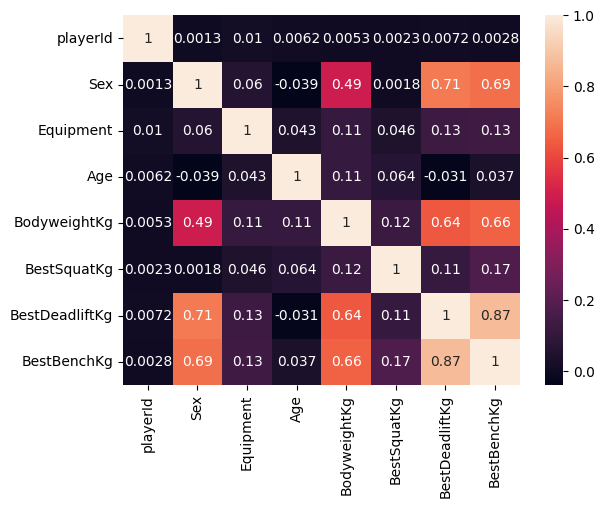

In [ ]:
import seaborn as sns
sns.heatmap(cor,annot=True)

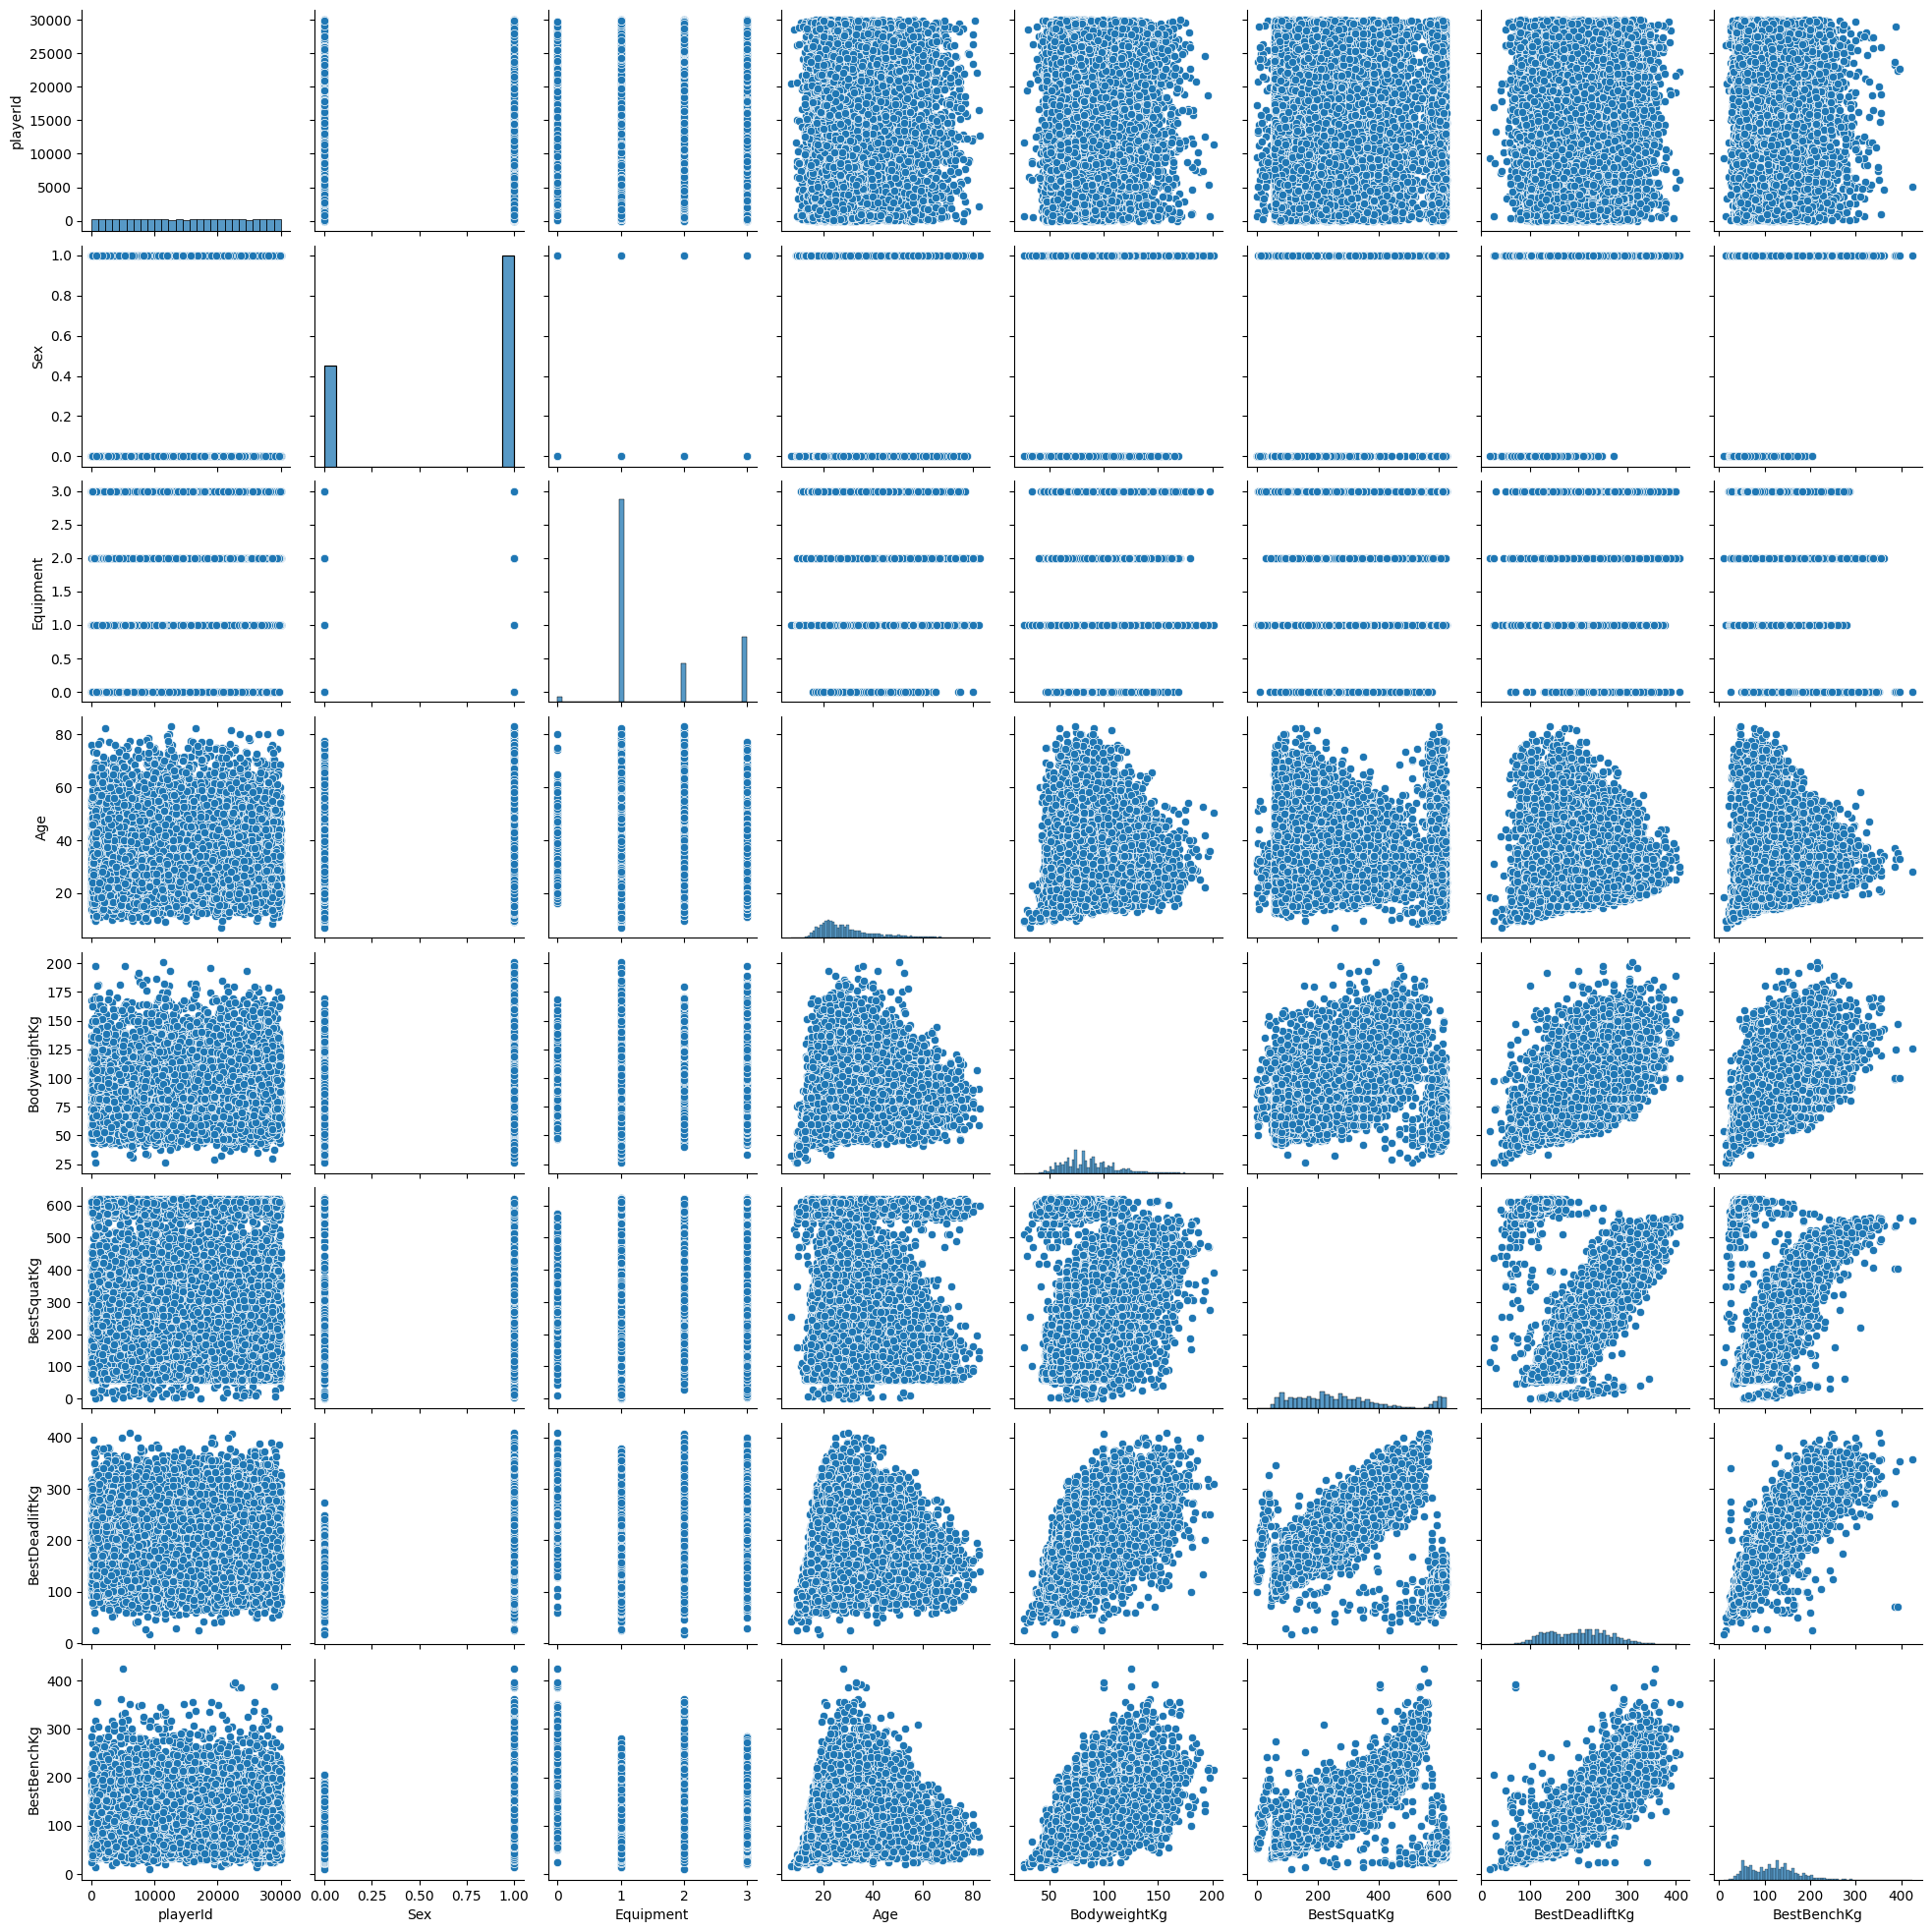

In [ ]:
sns.pairplot(data)

**Splitting Data into Train and Test**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming you've already loaded your data as 'data' and performed the merge operation

data.drop(columns=['Name'], axis=1, inplace=True)
y = data['BestDeadliftKg']
x = data.drop(columns=['BestDeadliftKg'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)

(13230, 7)
(5670, 7)


In [ ]:
print(y_train.shape)
print(y_test.shape)

(13230,)
(5670,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import xgboost as xgb
X_train

,playerId,Sex,Equipment,Age,BodyweightKg,BestSquatKg,BestBenchKg
6335,7623.0,0,1,37.0,107.37,168,72.5
844,25912.0,1,3,26.0,130.00,518,200.0
2421,23278.0,1,1,28.0,127.20,240,155.0
17006,29880.0,1,1,22.5,82.43,310,150.0
1875,13172.0,1,1,20.5,117.77,438,202.5
...,...,...,...,...,...,...,...
9225,20516.0,1,1,30.0,109.72,351,202.5
13123,23596.0,1,1,21.5,92.30,298,130.0
9845,18812.0,0,1,28.0,84.91,168,77.5
10799,16195.0,1,1,20.5,81.60,203,102.5


In [ ]:
y_train

6335     177.5
844      352.5
2421     210.0
17006    262.5
1875     310.0
         ...  
9225     227.5
13123    257.5
9845     165.5
10799    217.5
2732     145.0
Name: BestDeadliftKg, Length: 13230, dtype: float64

In [ ]:
lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred1 = lr.predict(X_test)


In [ ]:
mse=mean_squared_error(y_test, y_pred1)
rmse=np.sqrt(mse)
print("RMSE value: {:.2f}".format(rmse))
print("Training accuracy for Linear Regression: {:.2f}".format(lr.score(X_train,y_train)*100),'%')
print("Testing accuracy for Linear Regression: {:.2f}".format(lr.score(X_test,y_test)*100),'%')

RMSE value: 27.87
Training accuracy for Linear Regression: 79.56 %
Testing accuracy for Linear Regression: 79.96 %


In [ ]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred2=rf.predict(X_test)

In [ ]:
mse=mean_squared_error(y_test,y_pred2)
rmse=np.sqrt(mse)
print("RMSE value: {:.2f}".format(rmse))
print("Training accuracy for Random Forest: {:.2f}".format(rf.score(X_train,y_train)*100),'%')
print("Testing accuracy for Random Forest: {:.2f}".format(rf.score(X_test,y_test)*100),'%')

RMSE value: 21.84
Training accuracy for Random Forest: 98.29 %
Testing accuracy for Random Forest: 87.70 %


In [ ]:
dt= DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred3=dt.predict(X_test)

In [ ]:
mse=mean_squared_error(y_test,y_pred3)
rmse=np.sqrt(mse)
print("RMSE value: {:.2f}".format(rmse))
print("Training accuracy for Decision Tree: {:.2f}".format(rf.score(X_train,y_train)*100),'%')
print("Testing accuracy for Decision tree: {:.2f}".format(rf.score(X_test,y_test)*100),'%')

RMSE value: 29.80
Training accuracy for Decision Tree: 98.29 %
Testing accuracy for Decision tree: 87.70 %


In [ ]:
xg_reg=xgb.XGBRegressor(n_estimators=50,max_depth=2,learning_rate=0.5)
xg_reg.fit(X_train,y_train)
y_pred4=xg_reg.predict(X_test)

In [ ]:
mse=mean_squared_error(y_test,y_pred4)
rmse=np.sqrt(mse)
print("RMSE value: {:.2f}".format(rmse))
print("Training accuracy for XgBoost Model: {:.2f}".format(xg_reg.score(X_train,y_train)*100),'%')
print("Testing accuracy for XgBoost Model: {:.2f}".format(xg_reg.score(X_test,y_test)*100),'%')

RMSE value: 21.40
Training accuracy for XgBoost Model: 88.39 %
Testing accuracy for XgBoost Model: 88.19 %


**Comparing models**

In [ ]:
from prettytable import PrettyTable
tb=PrettyTable()
tb.field_names={"Model","RMSE","Training Accuracy","Testing Accuracy"}
tb.add_row(["Linear Regression",27.87,79.56,79.96])
tb.add_row(["Random Forest",21.76,98.33,87.79])
tb.add_row(["Decision Tree",29.94,98.33,87.79])
tb.add_row(["XbBoost",21.71,88.42,87.84])

In [ ]:
print(tb)

+-------------------+-------------------+------------------+-------+
|        RMSE       | Training Accuracy | Testing Accuracy | Model |
+-------------------+-------------------+------------------+-------+
| Linear Regression |       27.87       |      79.56       | 79.96 |
|   Random Forest   |       21.76       |      98.33       | 87.79 |
|   Decision Tree   |       29.94       |      98.33       | 87.79 |
|      XbBoost      |       21.71       |      88.42       | 87.84 |
+-------------------+-------------------+------------------+-------+


In [ ]:
from sklearn.model_selection import cross_val_score
cv=cross_val_score(rf,x,y,cv=5)
np.mean(cv)

0.8802102845010074

**Saving the model**

In [ ]:
import joblib

In [ ]:
model = xg_reg  # Replace with your actual trained model
joblib.dump(model, 'xg_model.joblib')


['xg_model.joblib']